#### ЛАБОРАТОРНАЯ РАБОТА №1-2
<strong>Тема:</strong> Разработка программных модулей

<strong>Цель:</strong> Научиться разрабатывать простейшие модули программ.

In [40]:
import random as r
import matplotlib.pyplot as plt
import numpy as np

1) Даны координаты вершин многоугольника (х1,у1,х2,у2,х3,у3,…х10,у10).
Определить его периметр (вычисление расстояния между вершинами оформить
подпрограммой).

P = 87.3251089722423


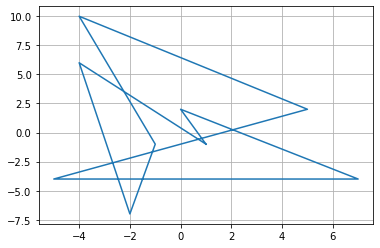

In [64]:
points = np.array([[r.randint(-10, 10), r.randint(-10, 10)] for _ in range(9)])
points = np.append(points, [points[0]], axis=0)

lines_size = [(abs(points[i-1][0] - points[i][0])**2 + abs(points[i-1][1] - points[i][1])**2)**(1/2) for i in range(len(points)) if i > 0]
p = sum(lines_size)
print(f'P = {p}')

#plot
plt.plot(points[:, 0], points[:, 1])
plt.grid(True)
plt.show()




2) Составить программу для вычисления суммы факториалов всех нечетных чисел
от1 до 9.

In [79]:
def get_f(num):
    if num == 0: return 1

    f = 1
    for n in range(1, num+1): f *= n
    return f

f_test = [get_f(num) for num in range(10) if num % 2 != 0]

print(f_test)


[1, 6, 120, 5040, 362880]


3) Составить программу для нахождения наименьшего общего кратного двух
натуральных чисел

##### $НОК(A,B) = \frac{A\cdot B}{НОД(A,B)}$